# Example notebook

Here we display basic use case for plotting the zero-crossing statistics of a Cauchy coloured noise

In [25]:
# ! pip install -r requirements.txt

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from generators import simulate_cauchy_coloured_noise, ffm
from postprocessing import crossing_intervals, plot_pdf

### 1. Define an autocorrelation function 
This will determine the memory properties inherent in the process

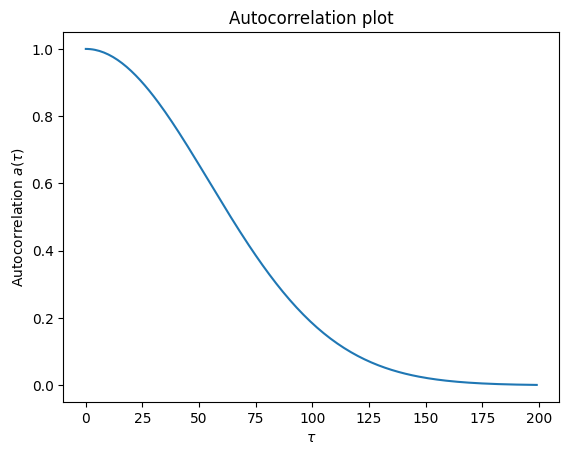

In [2]:
def acf(tau: float) -> float: 
    half_life=64
    decay_constant=np.log(2)*half_life**-2
    return np.exp(-decay_constant*tau**2) 


X=np.arange(0,200)
Y=acf(X)

plt.figure()
plt.plot(X, Y)
plt.xlabel(r'$\tau$')
plt.ylabel(r'Autocorrelation $a(\tau)$')
plt.title(r'Autocorrelation plot')
plt.show()

### 2. Crossing statistics of Gaussian process

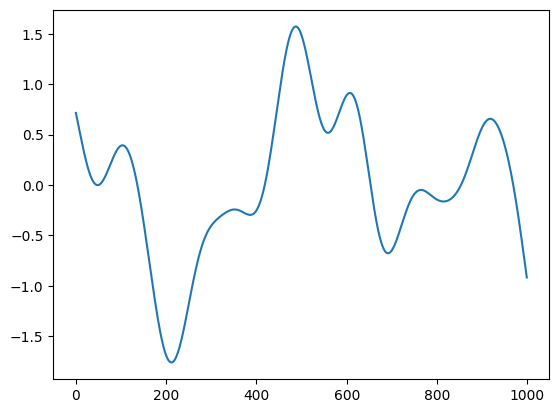

In [14]:
size=2**20
gaussian_noise=ffm(acf, size)
plt.plot(gaussian_noise[:1000]);

Gaussian crossing intervals=[104 198 104 ... 195 175  89]


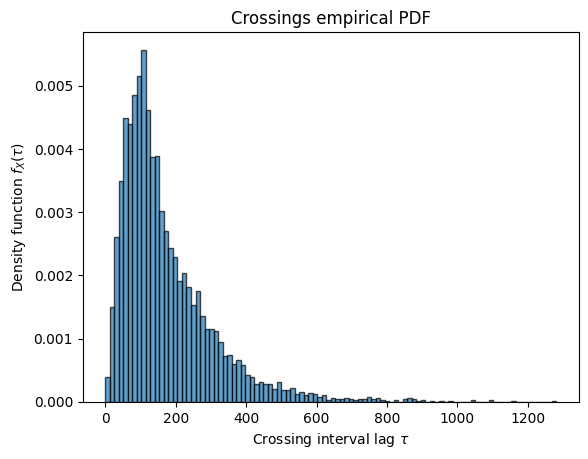

In [8]:
gaussian_crossings=crossing_intervals(gaussian_noise)
print(f"Gaussian crossing intervals={gaussian_crossings}")
plot_pdf(gaussian_crossings,bins=100)

### 3. Crossings of Cauchy coloured noise

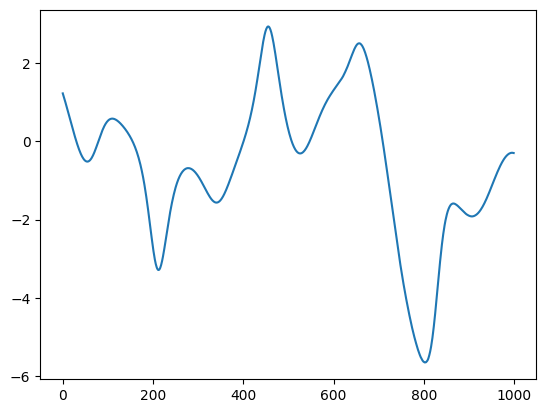

In [15]:
cauchy_coloured_noise=simulate_cauchy_coloured_noise(autocorrelation_function=acf,size=size)
plt.plot(cauchy_coloured_noise[:1000]);

Cauchy crossing intervals=[ 48  76 246 ... 493 163 219]


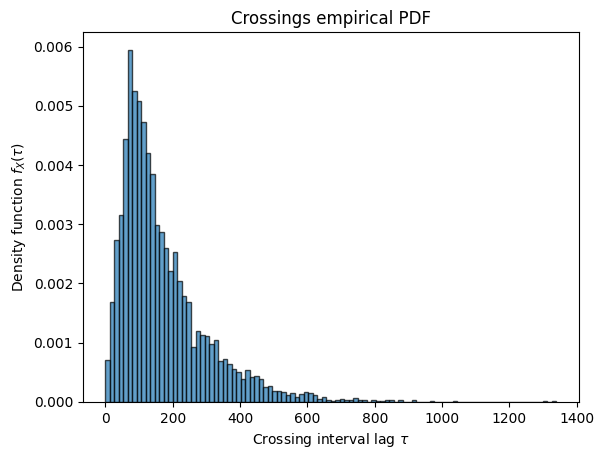

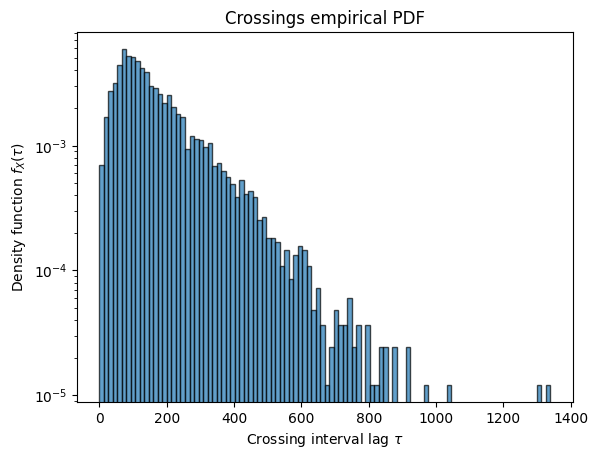

In [16]:
cauchy_crossings=crossing_intervals(cauchy_coloured_noise)
print(f"Cauchy crossing intervals={cauchy_crossings}")
plot_pdf(cauchy_crossings,bins=100)
plot_pdf(cauchy_crossings,bins=100,plot_log_y=True)